# Eksploracyjna analiza danych

In [1]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
with open('../data/processed/exploration_data.pkl', 'rb') as f:
    data = pickle.load(f)

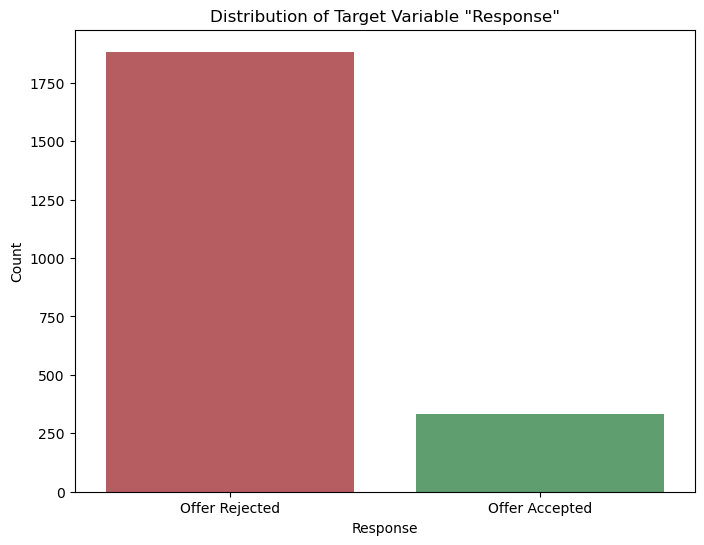

In [3]:
# Get the count of each class in the target variable
response_counts = data['Response'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, hue=response_counts.index, palette=['#c44e52', '#55a868'], legend=False)
plt.title('Distribution of Target Variable "Response"')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Offer Rejected', 'Offer Accepted'])
plt.show()


In [4]:
# Infer data types
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()

# Remove binary columns from numerical and categorical lists
numerical_features = [col for col in numerical_cols if data[col].nunique() > 5]
categorical_features = categorical_cols + [col for col in numerical_cols if data[col].nunique() <= 5 and col != 'Response']

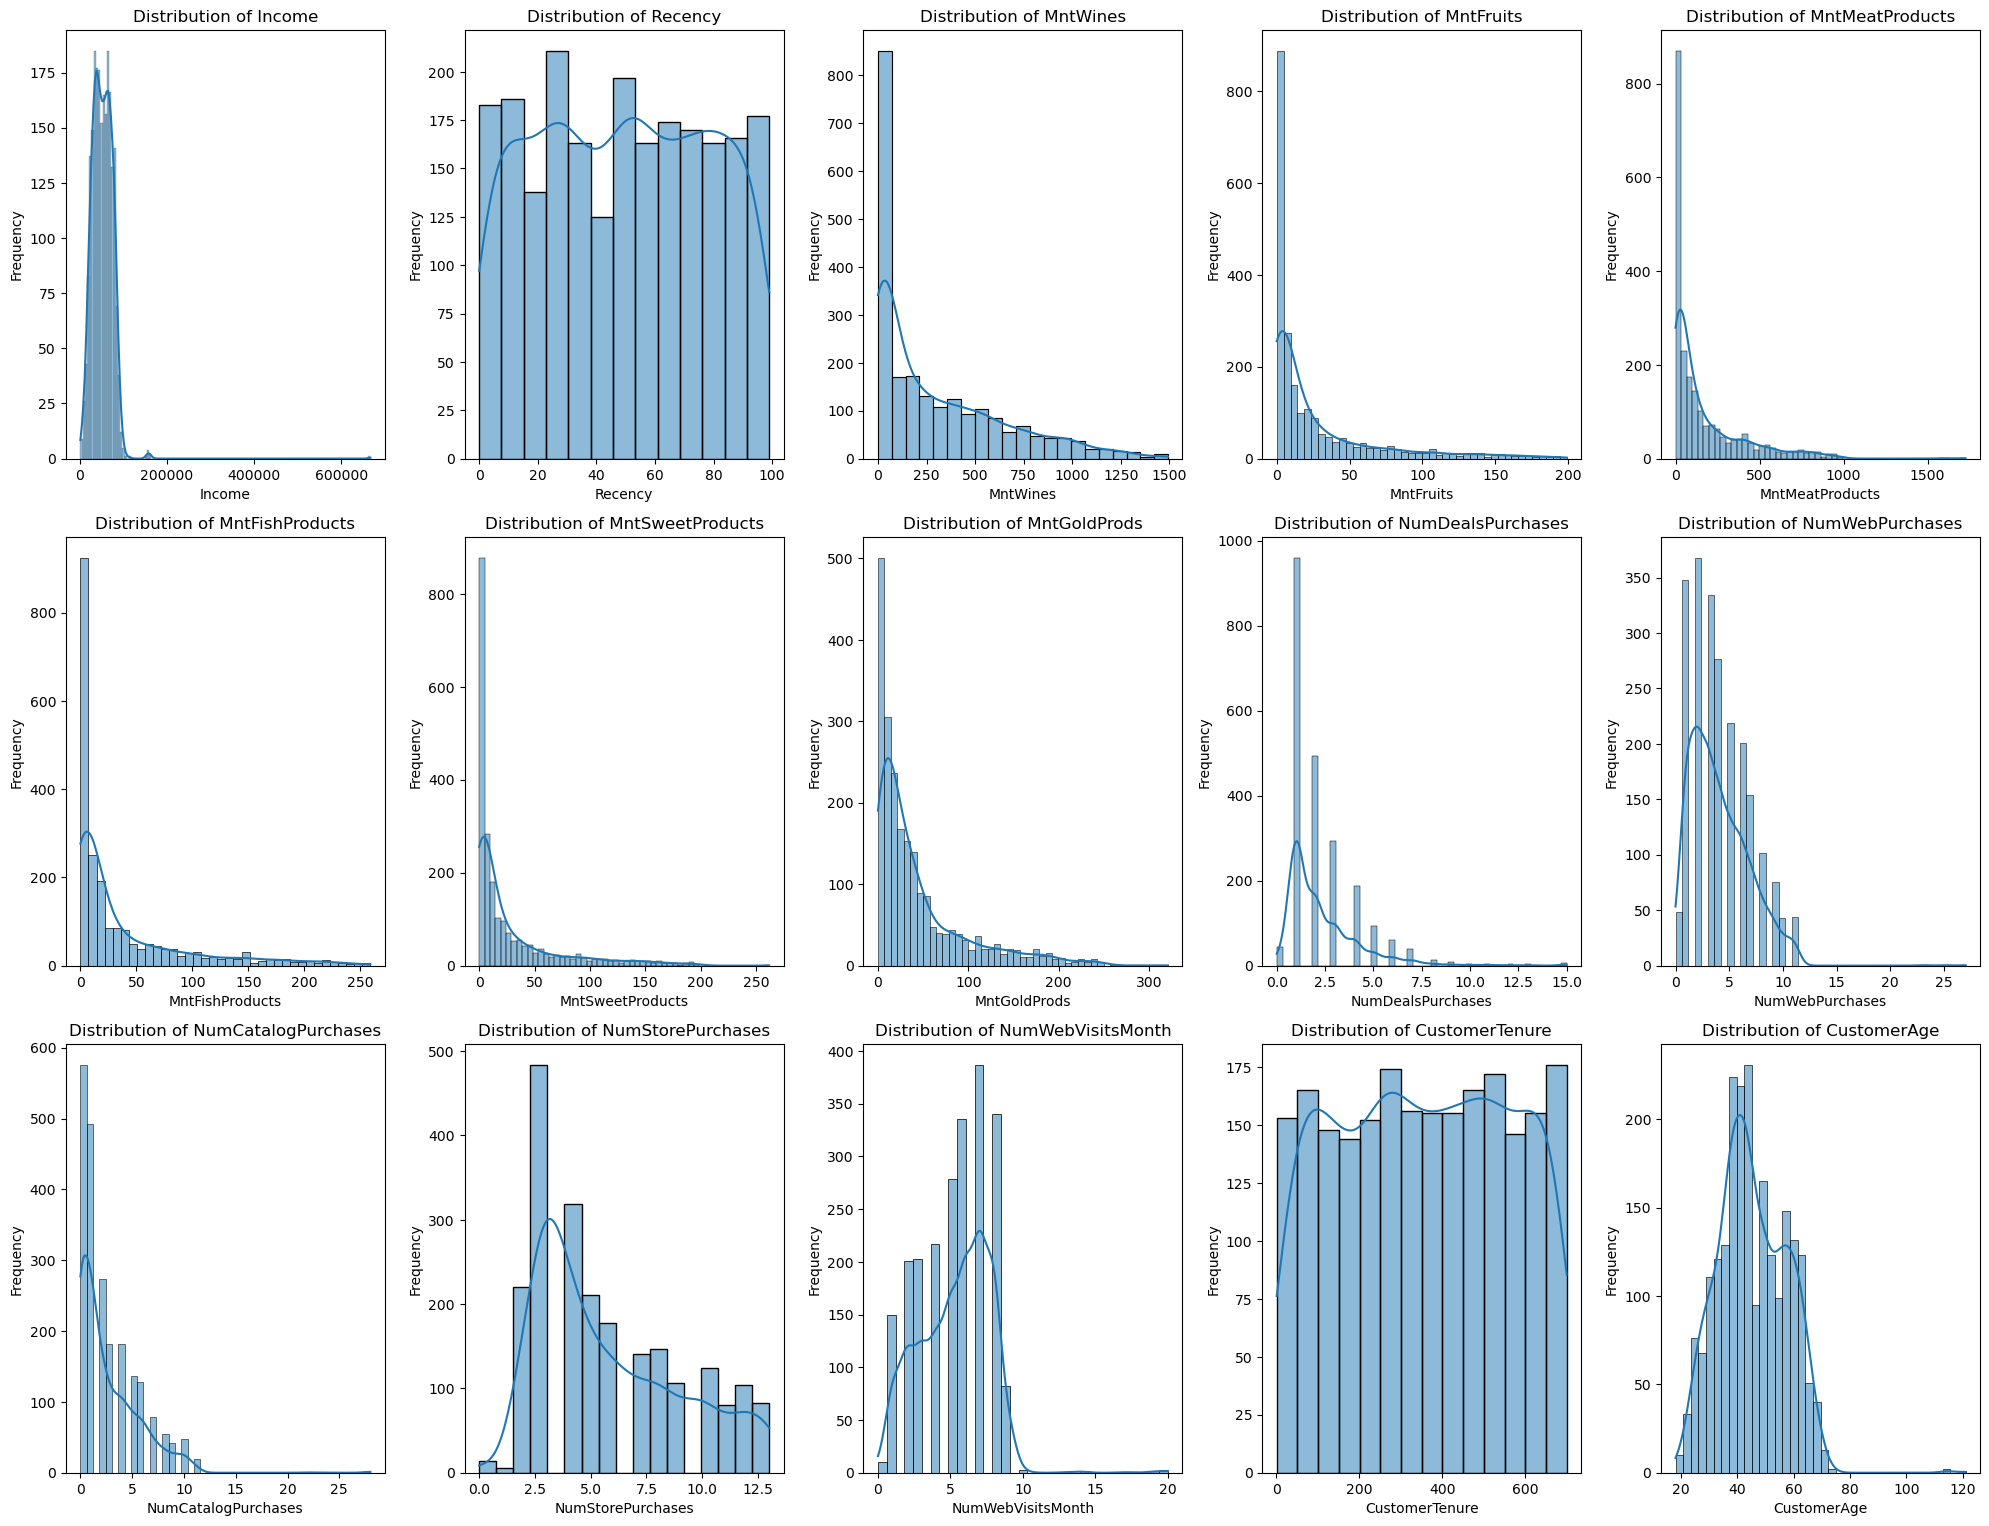

In [5]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[feature], kde=True,)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

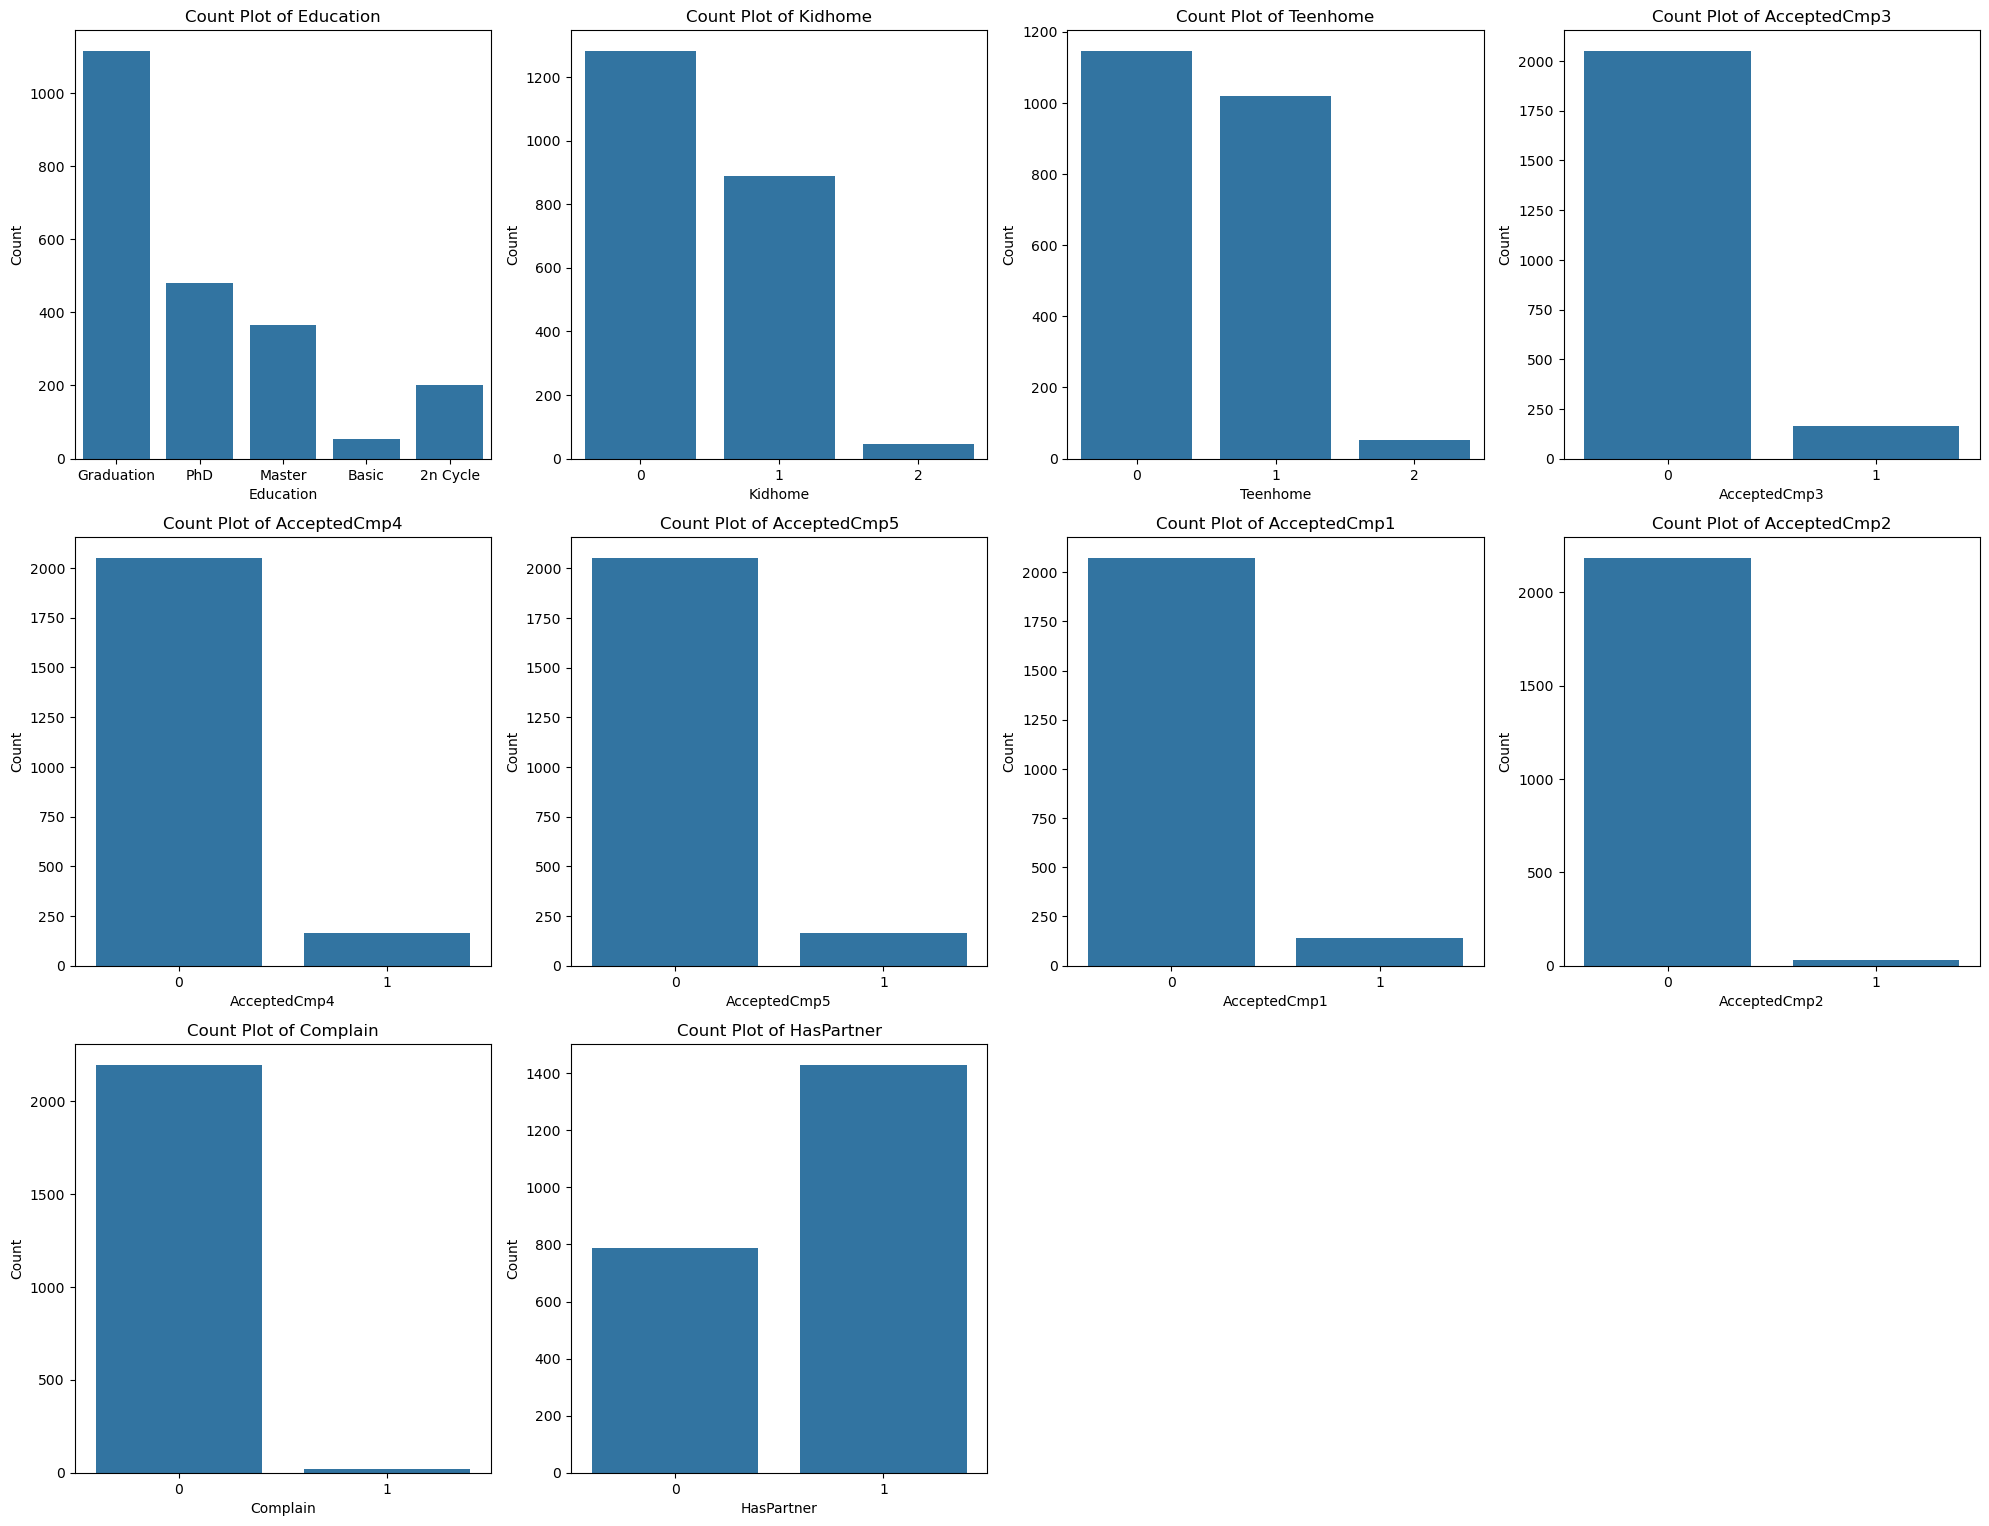

In [6]:
# 3. Count Plots for Categorical Features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=data,)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

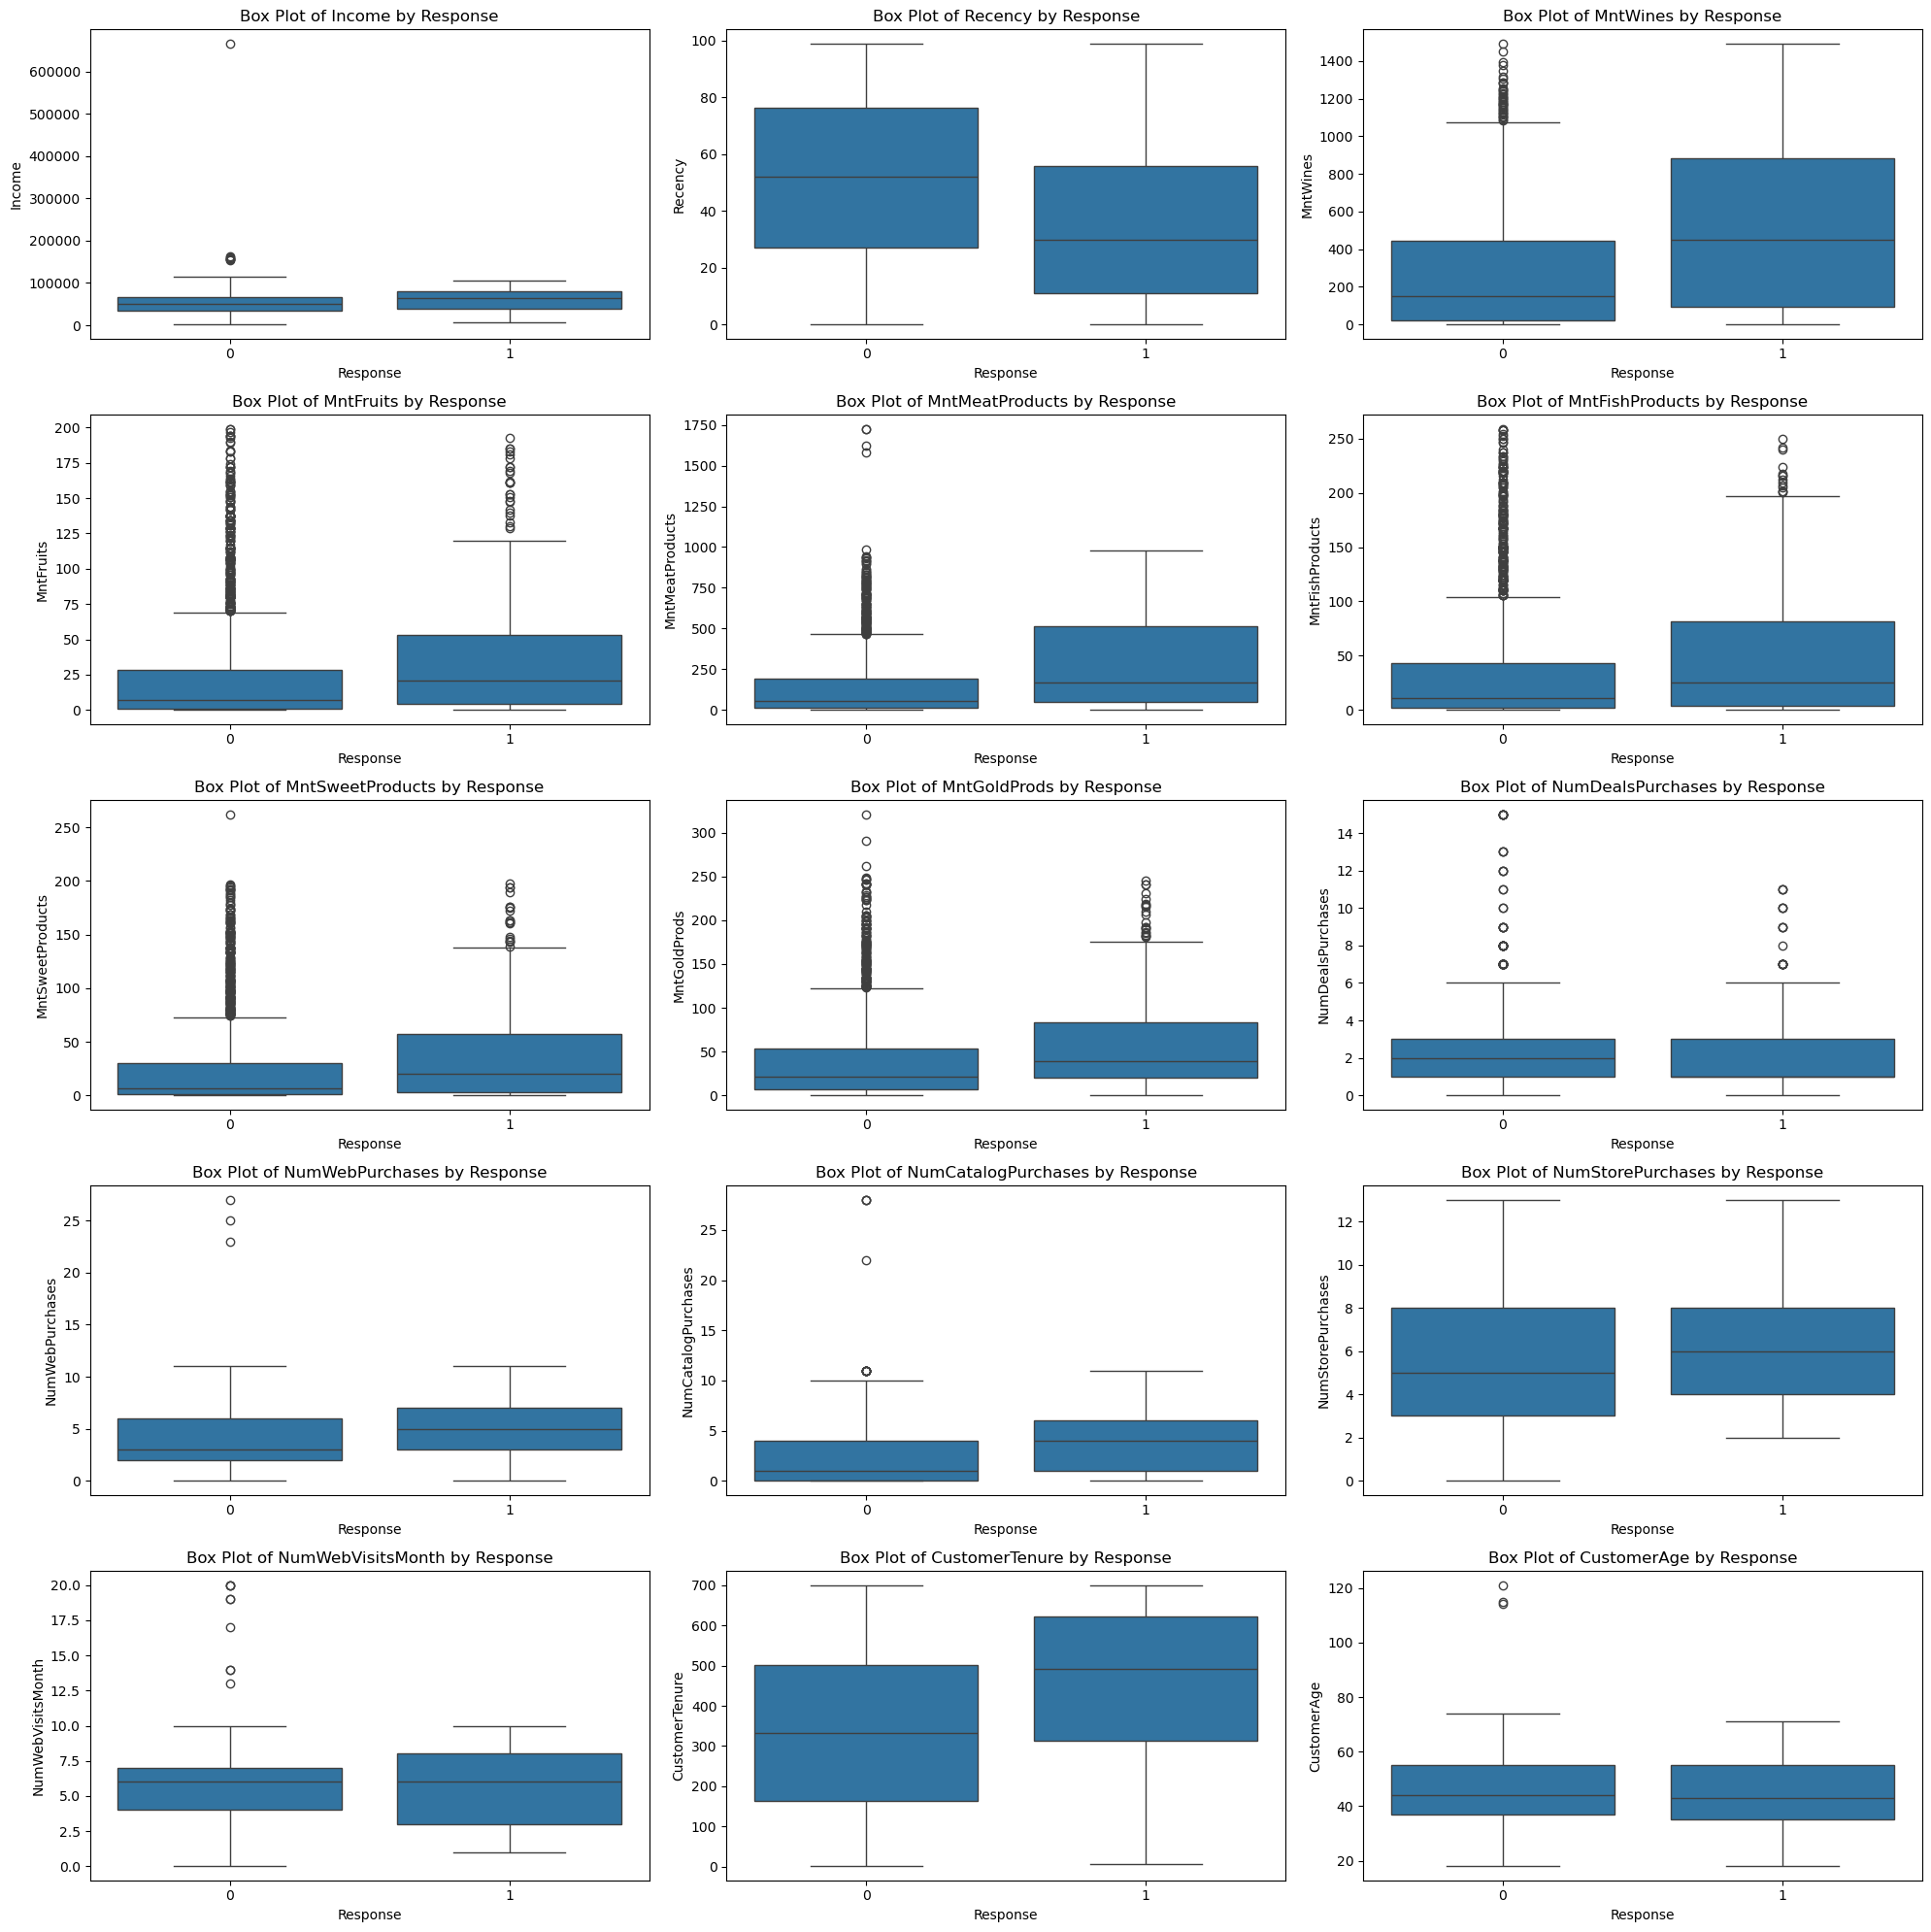

In [10]:
# 4. Box Plots to Show Distribution of Numerical Features by "Response"
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='Response', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Response')
    plt.xlabel('Response')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

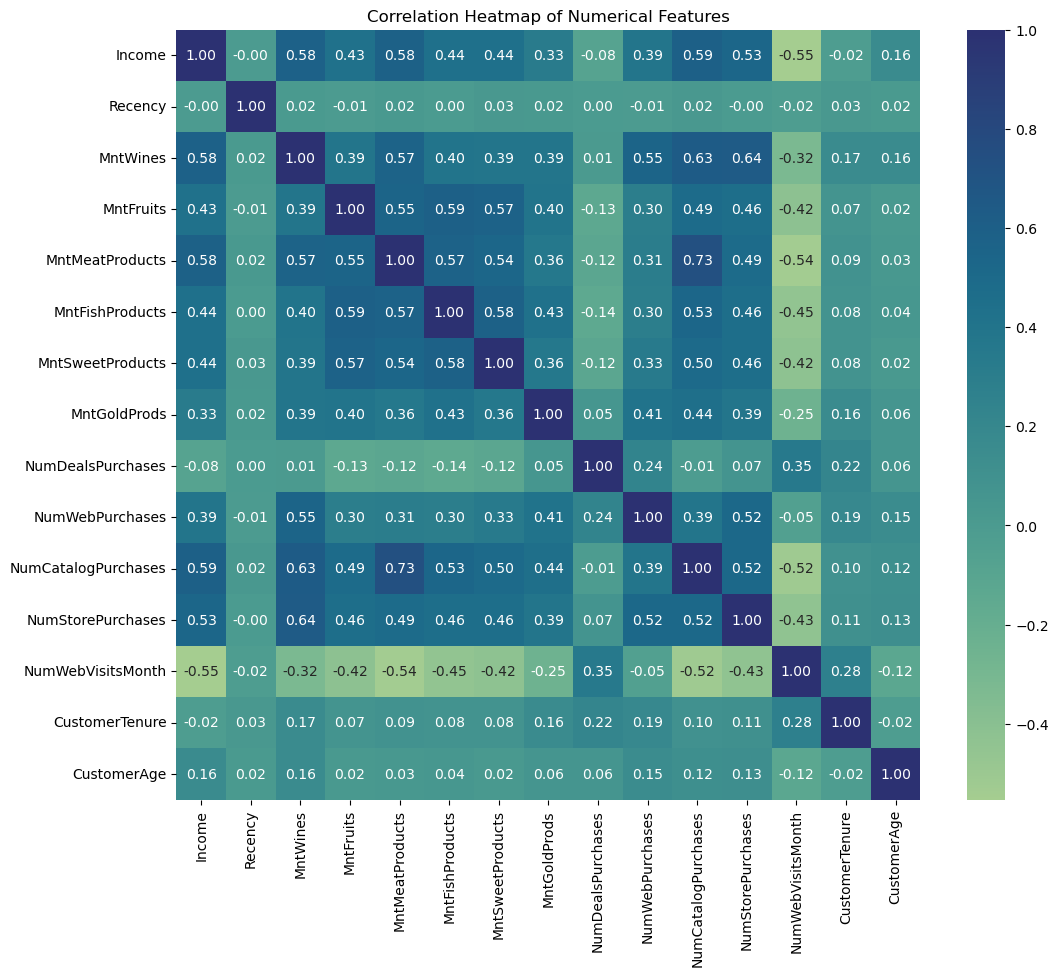

In [11]:
# 5. Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

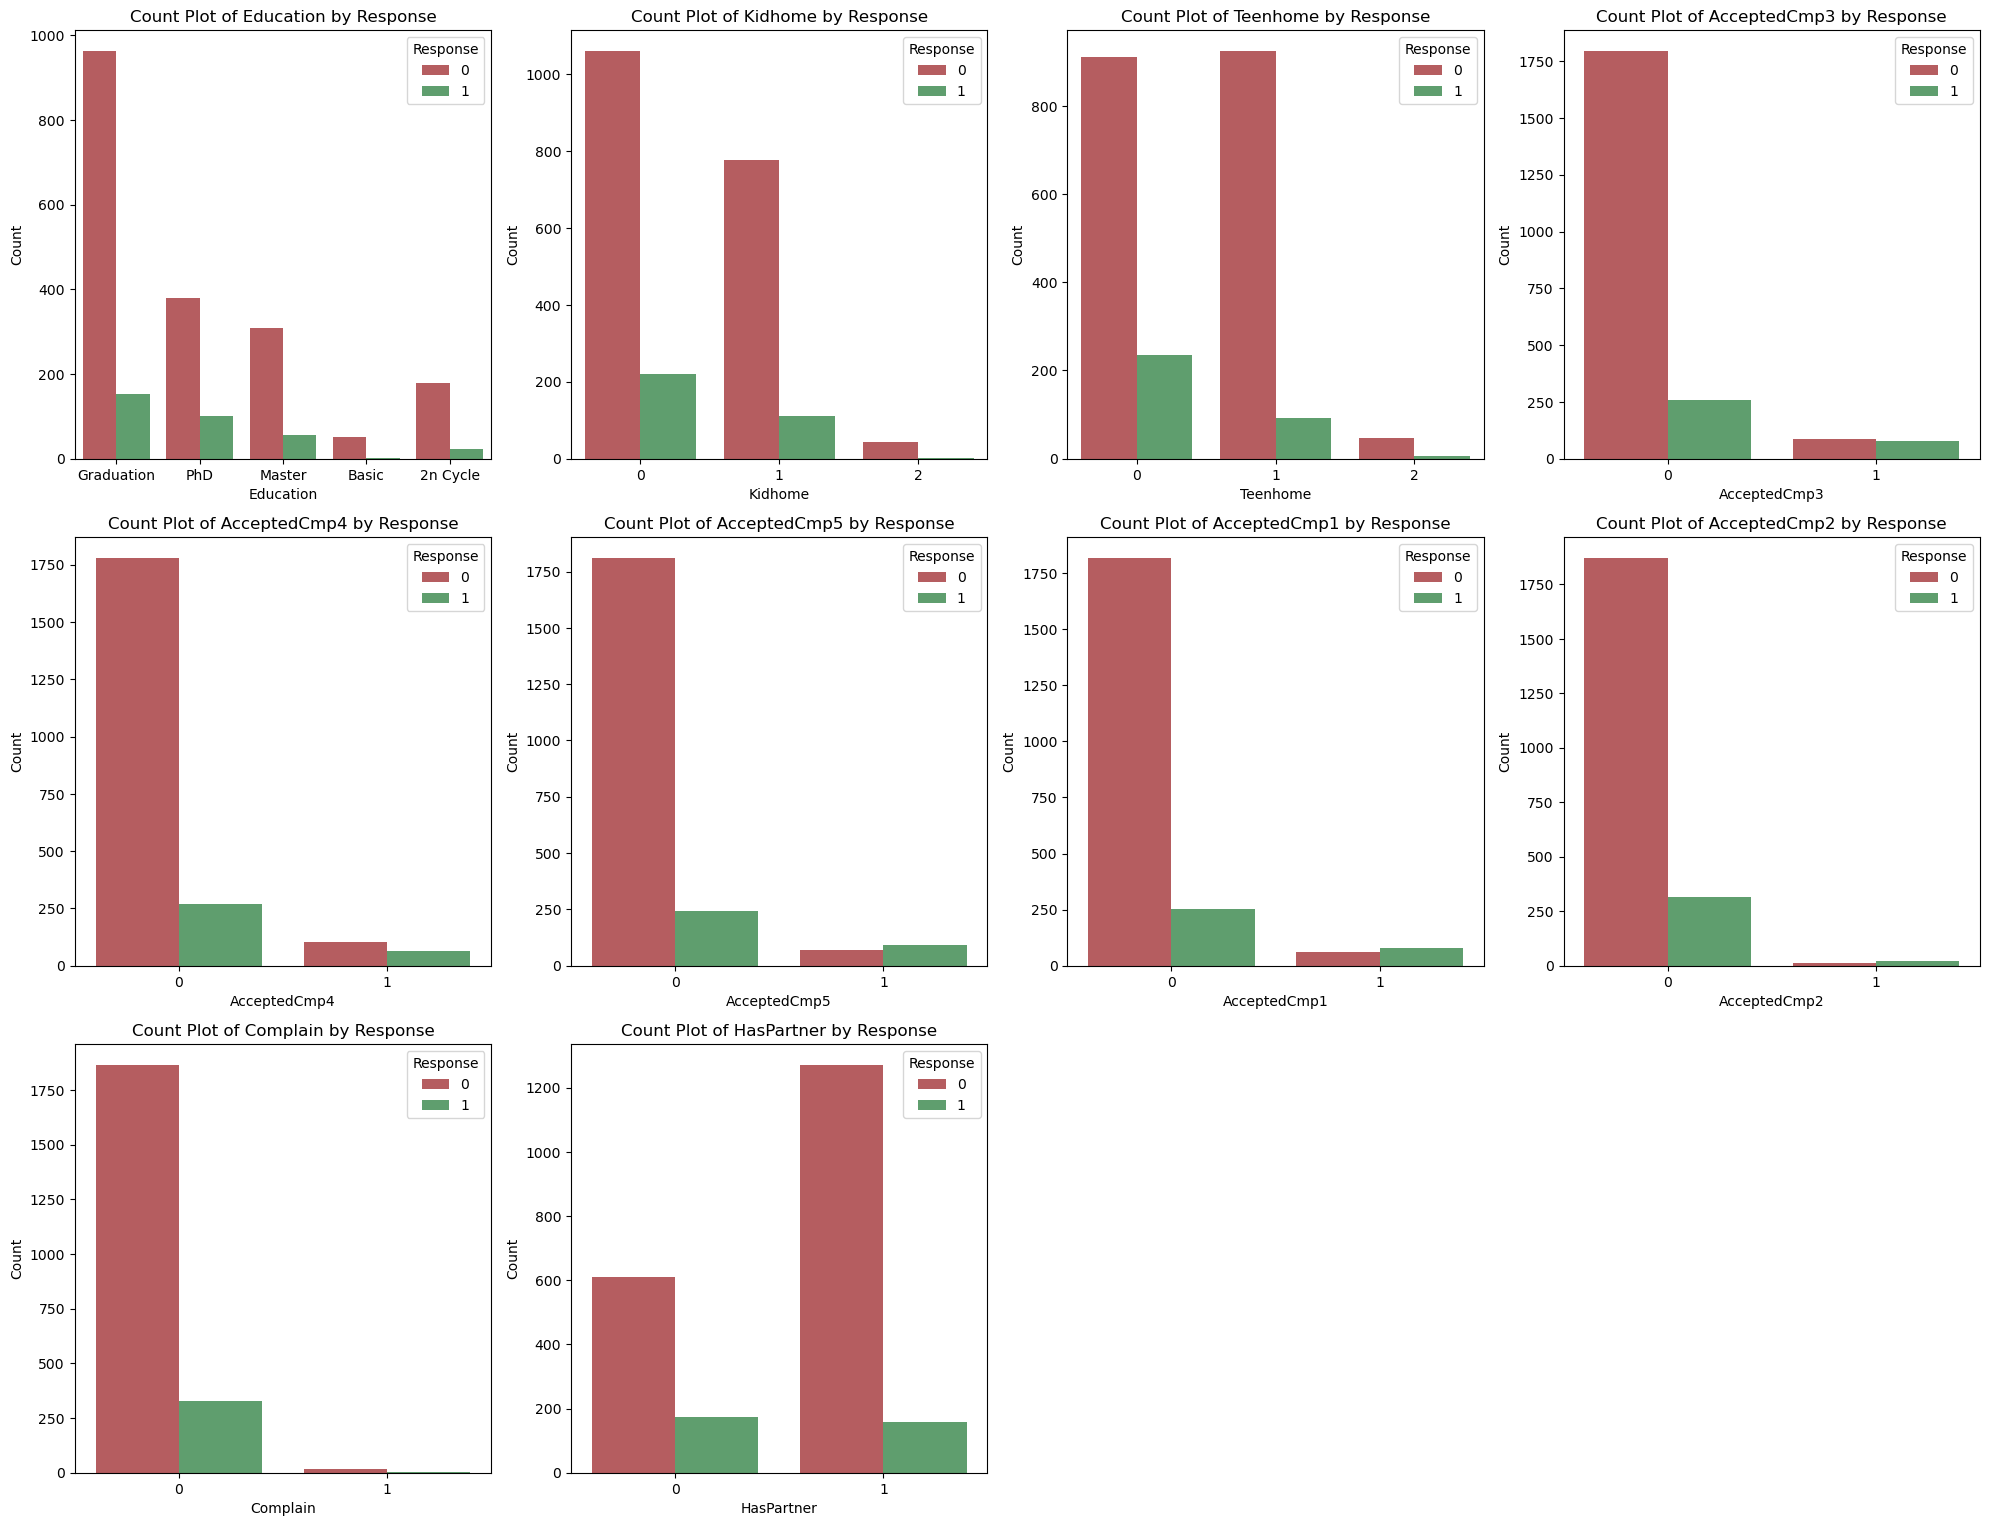

In [17]:
# 7. Count Plots for Categorical Features by "Response"
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=data, hue='Response', palette=['#c44e52', '#55a868'])
    plt.title(f'Count Plot of {feature} by Response')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

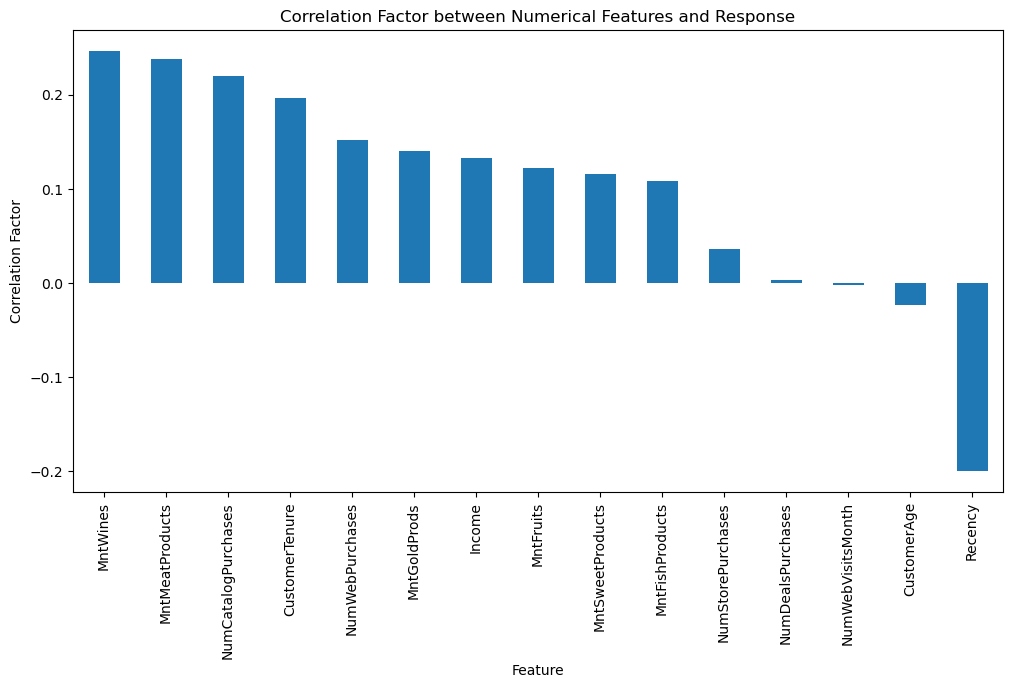

In [19]:
# 8. Plot of correlation factor between numerical features and response
correlation_matrix = data[numerical_features + ['Response']].corr()
correlation_with_response = correlation_matrix['Response'].sort_values(ascending=False)
correlation_with_response = correlation_with_response.drop('Response')
correlation_with_response.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation Factor between Numerical Features and Response')
plt.xlabel('Feature')
plt.ylabel('Correlation Factor')
plt.show()